<a href="https://colab.research.google.com/github/VALDE021/Prediction-of-Product-Sales/blob/main/Eric_N_Valdez's_Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of Product Sales**

- ## **Authored by:**
  - ***Eric N. Valdez***

## **Project Overview**

## **Load and Inspect Data**


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Imports
# Missingno
import missingno as msno
# Matplotlib
import matplotlib.pyplot as plt
#Seaborn
import seaborn as sns
#Pandas
import pandas as pd
# Numpy
import numpy as np
#Warnings
import warnings
pd.set_option('display.max_columns',100)

In [ ]:
import pandas as pd
fname = '/content/drive/MyDrive/#Data Science -C.D./CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df_sales = pd.read_csv(fname)
df_sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## **Clean Data**

1) How many rows and columns?

- 8523 rows and 12 columns

Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.

In [ ]:
# Checking rows and columns
df_sales.shape

(8523, 12)

In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


2) What are the datatypes of each variable?

In [ ]:
df_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3) Are there duplicates? If so, drop any duplicates.

no duplicates found

In [ ]:
df_sales.duplicated().sum()

0

In [ ]:
df_sales.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

4) Identify missing values.

In [ ]:
df_sales.isna()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
null_Outlet_Size = df_sales['Outlet_Size'].isna()
null_Outlet_Size

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

5) Address the missing values by using a placeholder value.

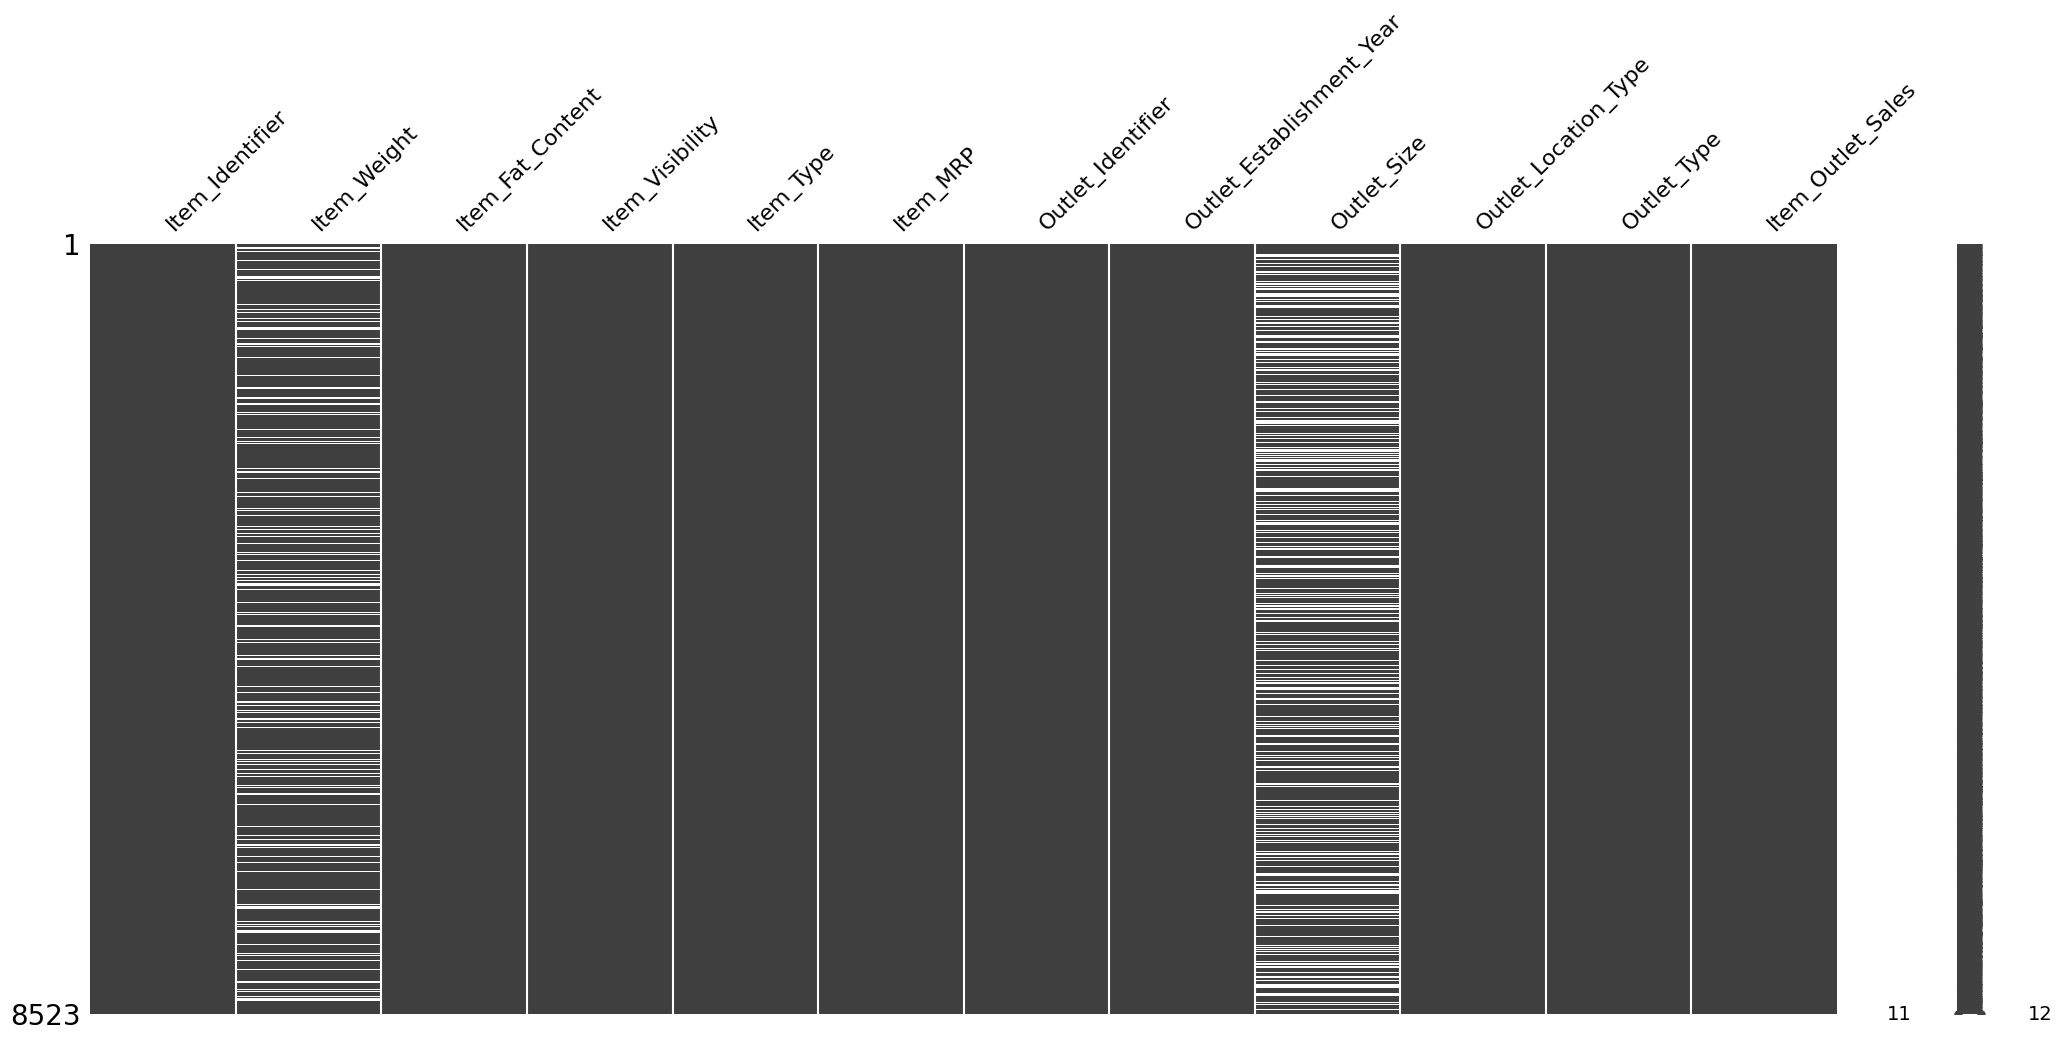

In [ ]:
msno.matrix(df_sales);

In [ ]:
# Filling in missing values with a placeholder
df_sales['Item_Weight'].fillna(-1, inplace=True)
df_sales['Outlet_Size'].fillna('missing', inplace=True)

6) Confirm that there are no missing values after addressing them.

In [ ]:
# This will give us the total number of null values (True) for each column
null_sums = df_sales.isna().sum()
null_sums

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
# Double checking floats
df_sales.isna().sum() / len(df_sales)*100

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

In [ ]:
cat_cols = df_sales.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
#Fix inconsistent catgories
from pandas.core.arrays.interval import value_counts
df_sales_object = df_sales.select_dtypes(include='object').columns
for object in df_sales_object:
  print(df_sales[object].value_counts())

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
Medium     27

In [ ]:
# Replace 'reg' with 'Regular, 'LF' & 'low fat' with "Low Fat"
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace({'LF':"Low Fat", 'low fat': "Low Fat", 'reg':"Regular" })

In [ ]:
# Checking Value Counts
df_sales['Item_Fat_Content'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object>

In [ ]:
# Replace inconsist value in Outlet Size
df_sales['Outlet_Size'] = df_sales['Outlet_Size'].replace({'High':"Large"})

In [ ]:
# Checking Value Counts
df_sales['Outlet_Size'].value_counts

<bound method IndexOpsMixin.value_counts of 0        Medium
1        Medium
2        Medium
3       missing
4         Large
         ...   
8518      Large
8519    missing
8520      Small
8521     Medium
8522      Small
Name: Outlet_Size, Length: 8523, dtype: object>

In [ ]:
c_columns = df_sales.select_dtypes(include=['object']).columns.tolist()
c_columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [ ]:
df_sales[c_columns] = df_sales[c_columns].fillna('MISSING')
df_sales.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

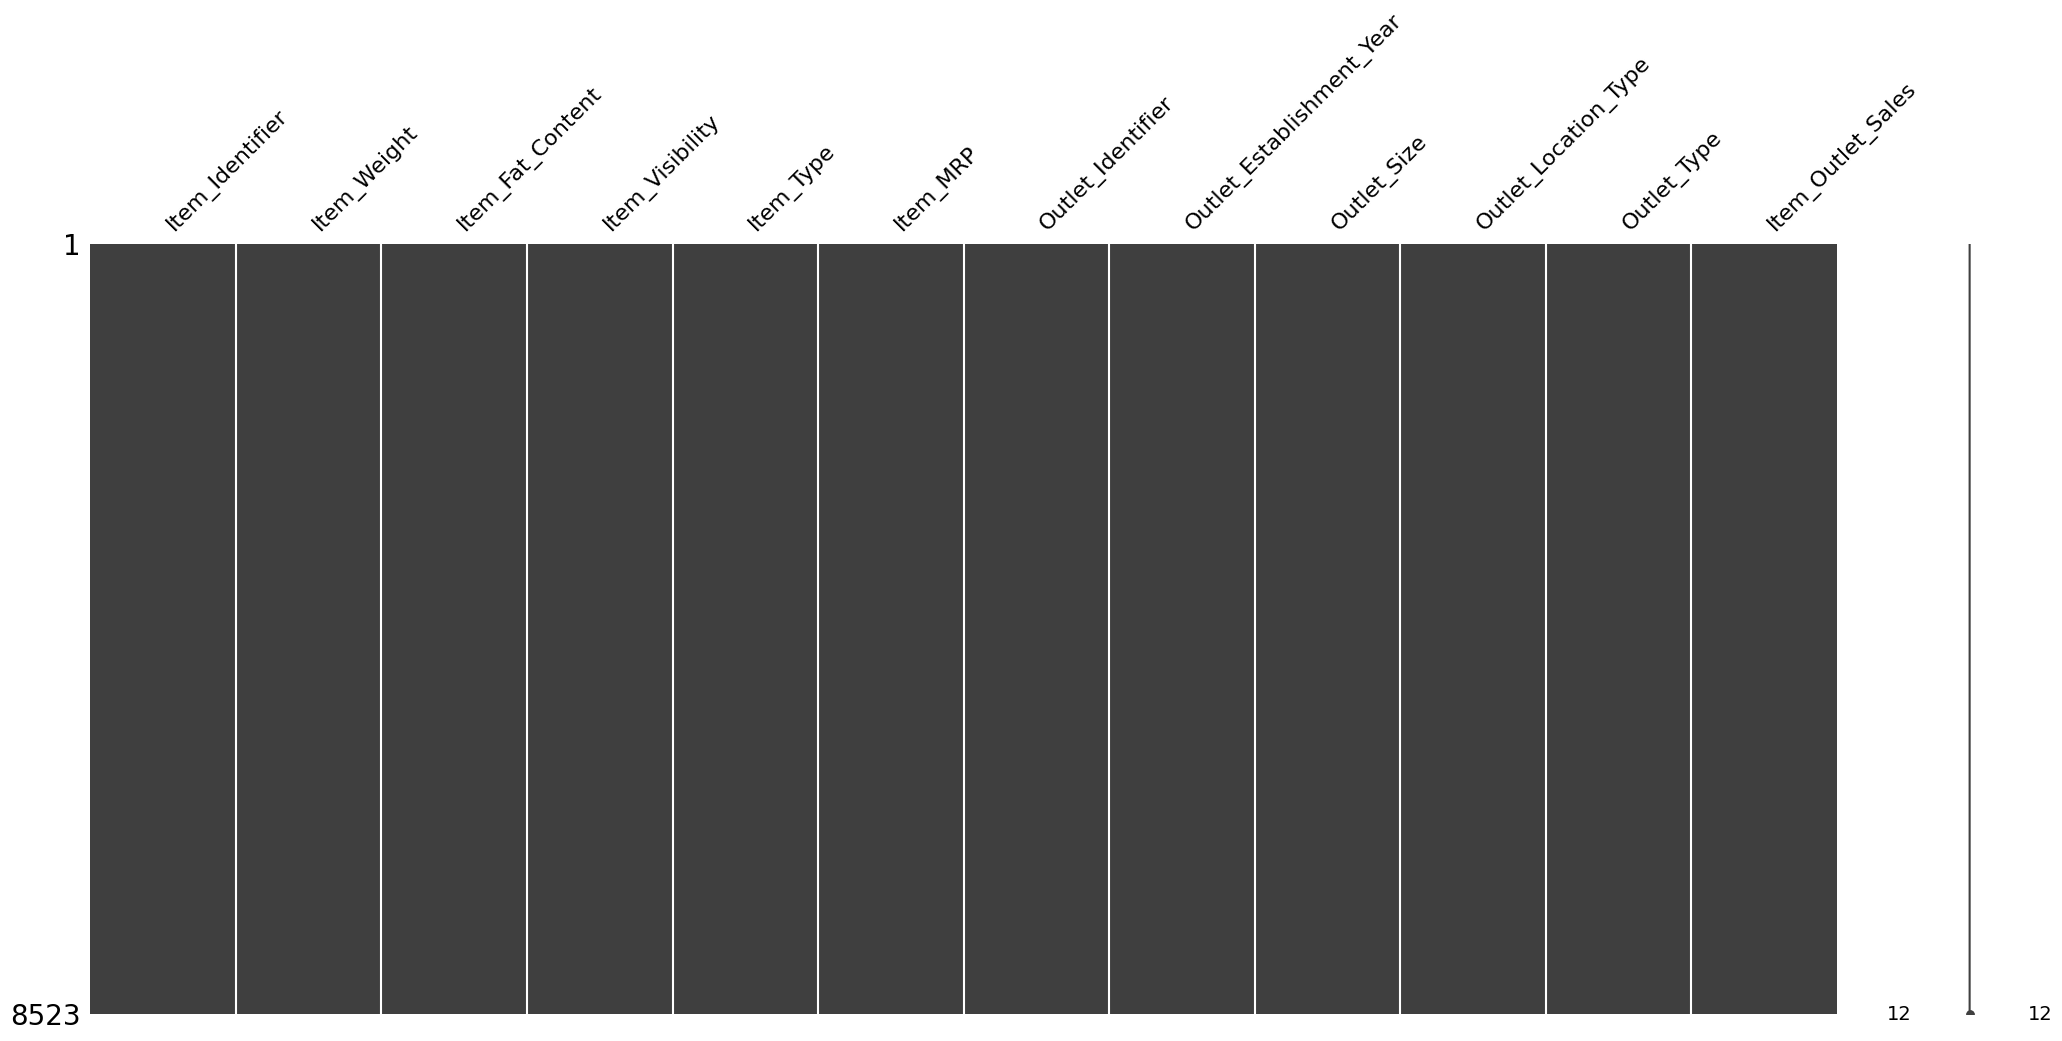

In [ ]:
msno.matrix(df_sales);

In [ ]:
df_sales.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:

string_cols = df_sales.select_dtypes("object").columns

In [ ]:
for cols in string_cols:
  print(f'Value Counts for {cols}')
  print(df_sales[cols].value_counts())

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
Value Counts for Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    92

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [ ]:
df_sales.describe().round()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.0,8523.0,8523.0,8523.0,8523.0
mean,10.0,0.0,141.0,1998.0,2181.0
std,7.0,0.0,62.0,8.0,1706.0
min,-1.0,0.0,31.0,1985.0,33.0
25%,7.0,0.0,94.0,1987.0,834.0
50%,11.0,0.0,143.0,1999.0,1794.0
75%,16.0,0.0,186.0,2004.0,3101.0
max,21.0,0.0,267.0,2009.0,13087.0


In [ ]:
num_cols = df_sales.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

## **Exploratory Data Analysis**

In [ ]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Large,Tier 3,Supermarket Type1,994.7052


In [ ]:
#
df_sales.describe(exclude= 'number')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523,8523
unique,1559,2,16,10,4,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5517,1232,935,2793,3350,5577


## Histograms:
- view the distributions of numerical features in your dataset.

In [ ]:
#Get correlations
corr = df_sales.corr(numeric_only = True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


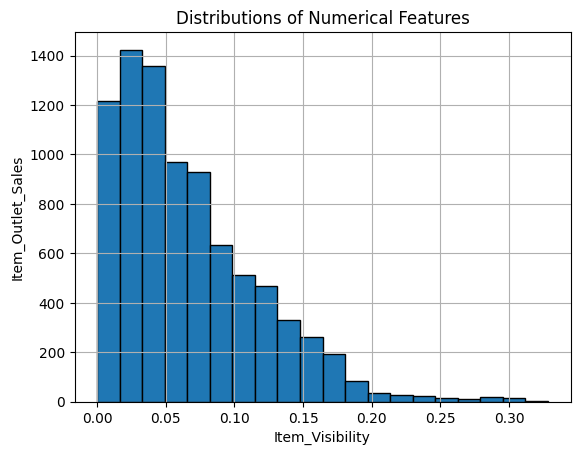

In [ ]:
# Creating a histogram
ax = df_sales['Item_Visibility'].hist(bins = 20, edgecolor = 'black')
ax.set_title('Distributions of Numerical Features')
ax.set_xlabel('Item_Visibility')
ax.set_ylabel('Item_Outlet_Sales');

## Boxplots:
- view statistical summaries of numerical features in your dataset.


Text(0.5, 1.0, 'Summaries of Numerical Features')

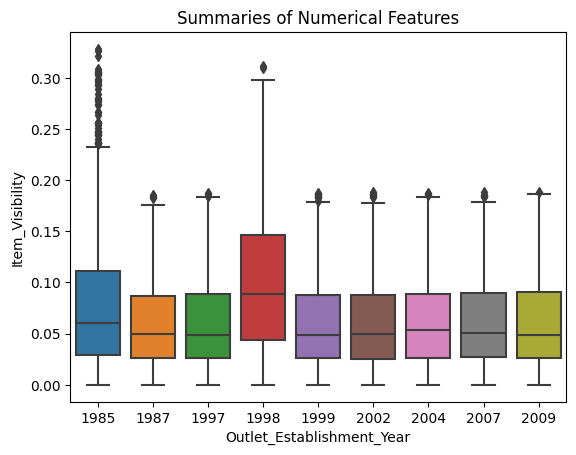

In [ ]:
# Creating a boxplot
ax = sns.boxplot(x = 'Outlet_Establishment_Year', y = 'Item_Visibility', data = df_sales)
# Setting a title
ax.set_title('Summaries of Numerical Features')

## Countplots:
- view the frequency of each class of categorial features in your dataset.


In [ ]:
# Creating a list to establish all columns in one for distribution
cat_cols = ['Item_Visibility', 'Item_MRP', 'Outlet_Established_Year', 'Item_outlet_Sales']
cat_cols

['Item_Visibility', 'Item_MRP', 'Outlet_Established_Year', 'Item_outlet_Sales']

- The above combing of all columns did not work because countplot could not distinguis the cat_cols list as one

Text(0.5, 1.0, 'Year Establishments')

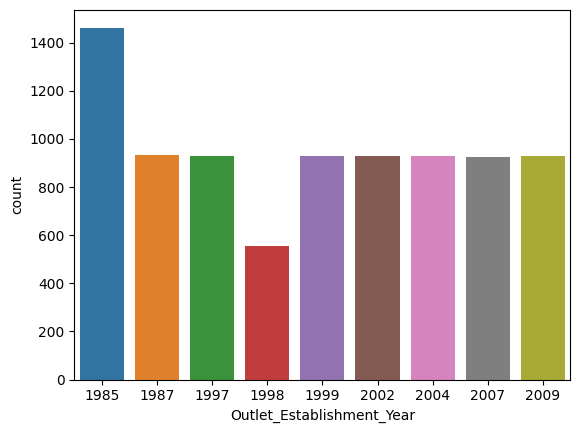

In [ ]:
# Creating a MatplotLib in seaborn.countplot()
sns.countplot(x = 'Outlet_Establishment_Year', data = df_sales)
# Setting a title
ax.set_title('Year Establishments')

## Heatmap:
- view the correlation between features.

In [ ]:
# Checking all Features in the dat frame for correlations
# Using df_sales.corr()
corr = df_sales.corr()
# Viewing Correlation values
corr.round(2)

<ipython-input-36-1820e40b7ceb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_sales.corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


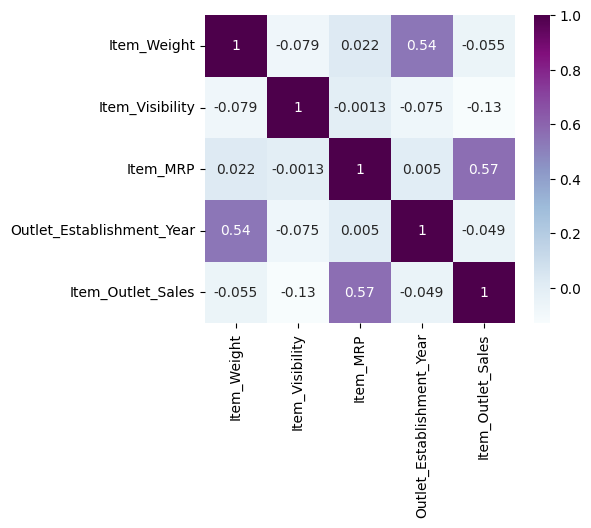

In [ ]:
# Heat map Subplot size is adjusted to fit all values using plt.subplots(figsize = )
fig, ax = plt.subplots(figsize = (5, 4))
sns.heatmap(corr,cmap = 'BuPu', annot = True);

## **Feature Inspection**
- ### **Remove the placeholders you added in week 2 and replace them with null values.**

**Reload Data**

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

### LOAD DATASET FROM GOOGLE DRIVE OR URL
# load data
# path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSlxm22ftBEbkw8AS5NSzggxMWRLD_gxJ8o6RTZqdrTcQXcEt3EpsShuEBbSWDSmWgB_xLgSDn2fxDH/pub?output=csv"

path = "/content/drive/MyDrive/#Data Science -C.D./CodingDojo/01-Fundamentals/Week04/Data/sales_predictions_2023.csv"
df = pd.read_csv(path)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Load Data sale_predictions_2023.csv
df = pd.read_csv('/content/drive/MyDrive/#Data Science -C.D./CodingDojo/01-Fundamentals/Week04/Data/sales_predictions_2023.csv')

### Pandas Display Configurations

In [9]:
## Display all columns
pd.set_option('display.max_column', None)

### **MatPlotLib rcParams**

In [10]:
## Graph Peramitters
## Set MatPlotLib default parameters
plt.rcParams.update({'figure.facecolor': 'white',
                          'font.weight': 'bold',
                      'patch.linewidth': 1.25,
                       'axes.facecolor': 'white',
                       'axes.edgecolor': 'black',
                       'axes.linewidth': 2,
                       'axes.titlesize': 14,
                     'axes.titleweight': 'bold',
                       'axes.labelsize': 12,
                     'axes.labelweight': 'bold',
                      'xtick.labelsize': 10,
                      'ytick.labelsize': 10,
                            'axes.grid': True,
                       'axes.grid.axis': 'y',
                           'grid.color': 'black',
                       'grid.linewidth': .5,
                           'grid.alpha': .25,
                   'scatter.edgecolors': 'black'})

## Data Dictionary
- **Item_Identifier**
  - Product ID
- **Item_Weight**
  - Weight of product
- **Item_Fat_Content**
   - Whether the product is low-fat or regular
- **Item_Visibility**
  - The percentage of total display area of all products in a store allocated to the particular product
- **Item_Type**
  - The category to which the product belongs
- **Item_MRP**
  - Maximum Retail Price (list price) of the product
- **Outlet_Identifier**
  - Store ID
- **Outlet_Establishment_Year**
  - The year in which store was established
- **Outlet_Size**
  - The size of the store in terms of ground area covered
- **Outlet_Location_Type**
  - The type of area in which the store is located
- **Outlet_Type**
  - Whether the outlet is a grocery store or some sort of supermarket
- **Item_Outlet_Sales**
  - Sales of the product in the particular store.
  - This is the target variable to be predicted.


## *.head()*

In [11]:
## Display the first (5) rows of the dataframe
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## *.shape*

In [12]:
## Display the number of rows and columns for the dataframe
df.shape

(8523, 12)

## .dtypes

In [13]:
## Display the column names and datatypes for each column
## Columns with mixed datatypes are identified as an object datatype
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## *.info()*

In [14]:
## Display the column names, count of non-null values, and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## *.decribe()*

In [15]:
## Display the descriptive statistics for the numeric columns
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [16]:
## Display the descriptive statistics for the object columns
df.describe(exclude='number')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


### **Exploratory Data Analysis**

### **Custom Functions**

## EDA Functions

##### **Univariate Functions**

###### **Explore Univariate Categorical Function**

In [17]:
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

### *Item_Identifier vs Item_Outlet_Sales*

**For Each Univariant Cat. Visualization**
  - **Answer the following questions from the Feature Inspection lesson in a markdown cell:**
    - What type of feature is it? (Categorical (nominal), ordinal, numeric)
      - `...`
    - How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
      - `...`
    - Is the feature constant or quasi-constant?
      - `...`
    - What is the cardinality? Is it high (>10)?
      - `...`
    - Would we know this feature before the target is determined?
      - `...`
    - Is there a business case/understanding reason to exclude based on our business case?
      - `...`


### *Item_Fat_Content vs Item_Outlet_Sale* italicized text

**For Each Univariant Cat. Visualization**
  - **Answer the following questions from the Feature Inspection lesson in a markdown cell:**
    - What type of feature is it? (Categorical (nominal), ordinal, numeric)
      - `...`
    - How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
      - `...`
    - Is the feature constant or quasi-constant?
      - `...`
    - What is the cardinality? Is it high (>10)?
      - `...`
    - Would we know this feature before the target is determined?
      - `...`
    - Is there a business case/understanding reason to exclude based on our business case?
      - `...`


### *Item_Type vs Item_Outlet_Sales*

**For Each Univariant Cat. Visualization**
  - **Answer the following questions from the Feature Inspection lesson in a markdown cell:**
    - What type of feature is it? (Categorical (nominal), ordinal, numeric)
      - `...`
    - How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
      - `...`
    - Is the feature constant or quasi-constant?
      - `...`
    - What is the cardinality? Is it high (>10)?
      - `...`
    - Would we know this feature before the target is determined?
      - `...`
    - Is there a business case/understanding reason to exclude based on our business case?
      - `...`


### *Outlet_Identifier vs Item_Outlet_Sales*

**For Each Univariant Cat. Visualization**
  - **Answer the following questions from the Feature Inspection lesson in a markdown cell:**
    - What type of feature is it? (Categorical (nominal), ordinal, numeric)
      - `...`
    - How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
      - `...`
    - Is the feature constant or quasi-constant?
      - `...`
    - What is the cardinality? Is it high (>10)?
      - `...`
    - Would we know this feature before the target is determined?
      - `...`
    - Is there a business case/understanding reason to exclude based on our business case?
      - `...`


### *Outlet_Size vs Item_Outlet_Sales*

**For Each Univariant Cat. Visualization**
  - **Answer the following questions from the Feature Inspection lesson in a markdown cell:**
    - What type of feature is it? (Categorical (nominal), ordinal, numeric)
      - `...`
    - How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
      - `...`
    - Is the feature constant or quasi-constant?
      - `...`
    - What is the cardinality? Is it high (>10)?
      - `...`
    - Would we know this feature before the target is determined?
      - `...`
    - Is there a business case/understanding reason to exclude based on our business case?
      - `...`


### *Outlet_Location_Type vs Item_Outlet_Sales*

**For Each Univariant Cat. Visualization**  
- **Answer the following questions from the Feature Inspection lesson in a markdown cell:**
    - What type of feature is it? (Categorical (nominal), ordinal, numeric)
      - `...`
    - How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
      - `...`
    - Is the feature constant or quasi-constant?
      - `...`
    - What is the cardinality? Is it high (>10)?
      - `...`
    - Would we know this feature before the target is determined?
      - `...`
    - Is there a business case/understanding reason to exclude based on our business case?
      - `...`


### *Outlet_Type vs Item_Outlet_Sales*

**For Each Univariant Visualization**
- **Answer the following questions from the Feature Inspection lesson in a markdown cell:**
    - What type of feature is it? (Categorical (nominal), ordinal, numeric)
      - `...`
    - How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
      - `...`
    - Is the feature constant or quasi-constant?
      - `...`
    - What is the cardinality? Is it high (>10)?
      - `...`
    - Would we know this feature before the target is determined?
      - `...`
    - Is there a business case/understanding reason to exclude based on our business case?
      - `...`


###### **Explore Univariate Numerical Function**

In [ ]:
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


## **Unvariate Visualization**
- Distribution of values / categories
  - You may use the EDA functions from the previous lessons or create your own visualizations.

In [ ]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

### *Item_Weight vs Item_Outlet_Sales*

**For Each Univariant Visualization**
- **Answer the following questions from the Feature Inspection lesson in a markdown cell:**
    - What type of feature is it? (Categorical (nominal), ordinal, numeric)
      - `...`
    - How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
      - `...`
    - Is the feature constant or quasi-constant?
      - `...`
    - What is the cardinality? Is it high (>10)?
      - `...`
    - Would we know this feature before the target is determined?
      - `...`
    - Is there a business case/understanding reason to exclude based on our business case?
      - `...`


### *Item_MRP vs Item_Outlet_Sales*

**For Each Univariant Visualization**
- **Answer the following questions from the Feature Inspection lesson in a markdown cell:**
    - What type of feature is it? (Categorical (nominal), ordinal, numeric)
      - `...`
    - How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
      - `...`
    - Is the feature constant or quasi-constant?
      - `...`
    - What is the cardinality? Is it high (>10)?
      - `...`
    - Would we know this feature before the target is determined?
      - `...`
    - Is there a business case/understanding reason to exclude based on our business case?
      - `...`


### *Item_Visibility vs Item_Outlet_Sales*

**For Each Univariant Visualization**
- **Answer the following questions from the Feature Inspection lesson in a markdown cell:**
    - What type of feature is it? (Categorical (nominal), ordinal, numeric)
      - `...`
    - How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
      - `...`
    - Is the feature constant or quasi-constant?
      - `...`
    - What is the cardinality? Is it high (>10)?
      - `...`
    - Would we know this feature before the target is determined?
      - `...`
    - Is there a business case/understanding reason to exclude based on our business case?
      - `...`


### *Outlet_Establishment_Year vs Item_Outlet_Sales*

**For Each Univariant Visualization**
- **Answer the following questions from the Feature Inspection lesson in a markdown cell:**
    - What type of feature is it? (Categorical (nominal), ordinal, numeric)
      - `...`
    - How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
      - `...`
    - Is the feature constant or quasi-constant?
      - `...`
    - What is the cardinality? Is it high (>10)?
      - `...`
    - Would we know this feature before the target is determined?
      - `...`
    - Is there a business case/understanding reason to exclude based on our business case?
      - `...`


## **Multivariate Visualization**
- **Create a multivariate visualization plotting each feature vs. the target.**
  - You may use the EDA functions from the previous lessons or create your own visualizations.​

##### **Multivariate Functions**
- **Item_Outlet_Sales**

In [27]:
## Define a variable to identify the feature
## Display the features datatype
feature = 'Item_Outlet_Sales'
df[feature].dtype

dtype('float64')

###### **Explore Multivariate Categorical Function**

In [ ]:
def plot_categorical_vs_target(df, x, y='SalePrice',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax

### *Item_Identifier vs Item_Outlet_Sale*

**For Each Multivariate Visulization**
- **Answer the following questions from the Feature Inspection lesson in a Markdown cell:**
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `...`
  - Does this feature appear to be a predictor of the target?
    - `...`

### *Item_Fat_Content vs Item_Outlet_Sale*

**For Each Multivariate Visulization**
- **Answer the following questions from the Feature Inspection lesson in a Markdown cell:**
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `...`
  - Does this feature appear to be a predictor of the target?
    - `...`

### *Item_Type vs Item_Outlet_Sale*

**For Each Multivariate Visulization**
- **Answer the following questions from the Feature Inspection lesson in a Markdown cell:**
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `...`
  - Does this feature appear to be a predictor of the target?
    - `...`

### *Outlet_Identifier vs Item_Outlet_Sales*

**For Each Multivariate Visulization**
- **Answer the following questions from the Feature Inspection lesson in a Markdown cell:**
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `...`
  - Does this feature appear to be a predictor of the target?
    - `...`

### *Outlet_Size vs Item_Outlet_Sales*

**For Each Multivariate Visulization**
- **Answer the following questions from the Feature Inspection lesson in a Markdown cell:**
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `...`
  - Does this feature appear to be a predictor of the target?
    - `...`

### *Outlet_Location_Type vs Item_Outlet_Sales*

**For Each Multivariate Visulization**
- **Answer the following questions from the Feature Inspection lesson in a Markdown cell:**
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `...`
  - Does this feature appear to be a predictor of the target?
    - `...`

### *Outlet_Type vs Item_Outlet_Sales*

**For Each Multivariate Visulization**
- **Answer the following questions from the Feature Inspection lesson in a Markdown cell:**
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `...`
  - Does this feature appear to be a predictor of the target?
    - `...`

###### **Explore Multivariate Numerical Function**

In [ ]:
def plot_numeric_vs_target(df, x, y='SalePrice',
                           figsize=(6,4)):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

In [ ]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='rating',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='rating',
                           figsize=(6,4),
                           ):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

### *Item_Weight vs Item_Outlet_Sales*

In [30]:
explore_numeric = Item_Weight

NameError: ignored

In [29]:
## Call Univariate Numerical EDA function
explore_numeric(df, feature);

NameError: ignored

**For Each Multivariate Visulization**
- **Answer the following questions from the Feature Inspection lesson in a Markdown cell:**
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `...`
  - Does this feature appear to be a predictor of the target?
    - `...`

### *Item_Visibility vs Item_Outlet_Sales*

**For Each Multivariate Visulization**
- **Answer the following questions from the Feature Inspection lesson in a Markdown cell:**
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `...`
  - Does this feature appear to be a predictor of the target?
    - `...`

### *Item_MRP vs Item_Outlet_Sales*

**For Each Multivariate Visulization**
- **Answer the following questions from the Feature Inspection lesson in a Markdown cell:**
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `...`
  - Does this feature appear to be a predictor of the target?
    - `...`

### *Outlet_Establishment_Year vs Item_Outlet_Sales*

In [26]:
Outlet_Establishment_Year vs Item_Outlet_Sales(df, feature);

SyntaxError: ignored

**For Each Multivariate Visulization**
- **Answer the following questions from the Feature Inspection lesson in a Markdown cell:**
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `...`
  - Does this feature appear to be a predictor of the target?
    - `...`

#### **Feature Inspection**

##### **Categorical Features**

###### **Item_Outlet_Sales**

In [18]:
## Define a variable to identify the feature
## Display the features datatype
feature = 'Item_Outlet_Sales'
df[feature].dtype

dtype('float64')

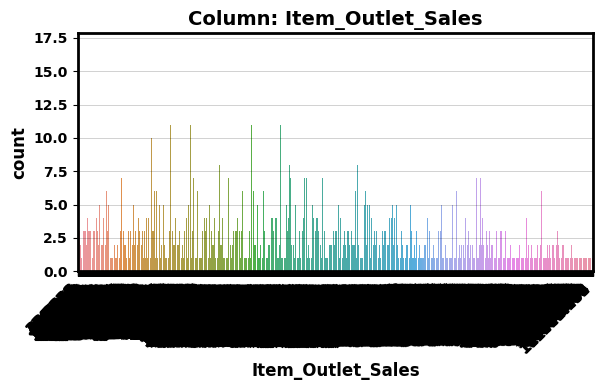

- NaN's Found: 0 (0.0%)
- Unique Values: 3493
- Most common value: '958.752' occurs 17 times (0.2%)
- Not constant or quasi-constant.


In [19]:
# Call Univariate Categorical EDA function
explore_categorical(df, feature);

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - This feature is categorical (nominal).
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - There are no missing values.
3. Is the feature constant or quasi-constant?
  - The feature is neither constant nor quasi-constant.
4. What is the cardinality? Is it high (>10)?
  - `...`
5. Would we know this feature before the target is determined?
  - `...`
6. Is there a business case/understanding reason to exclude based on our business case?
  -

In [23]:
## Call Multivariate Categorical EDA function
plot_categorical_vs_target(df, feature);

NameError: ignored

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - `...`
2. Does this feature appear to be a predictor of the target?
  - `...`

##### **Numerical Features**

###### **LotArea**

In [ ]:
## Call Univariate Numerical EDA function
explore_numeric(df, feature);

**1. What type of feature is it? (Categorical (nominal), ordinal, numeric)**
  - `...`

**2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)**
  - `...`

**3. Is the feature constant or quasi-constant?**
  - `...`

**4. What is the cardinality? Is it high (>10)?**
  - `...`

**5. Would we know this feature before the target is determined?**
  - `...`

**6. Is there a business case/understanding reason to exclude based on our business case?**
  - `...`

In [ ]:
## Call Multivariate Numerical EDA function
plot_numeric_vs_target(df, feature);

**1. Based on your business understanding, would you expect this feature to be a predictor of the target?**
  - `...`

**2. Does this feature appear to be a predictor of the target?**
  - `...`